# 04. Using a Convolutional Neural Network

After preprocessing our data, in this final code notebook, we will build our CNN to process said data.  The model itself will consist of sevearl layers: input, convolutional, pooling, densely connected and an output layer.

***NOTE:*** *Continuing with the ***UPDATE_n*** introduced in code notebook #3, there are some changes we made in this notebook as well.*

---
## Table of Contents

- [01. Import Libraries](#01.-Import-Libraries)
- [02. Load and Set Up Data](#02.-Load-and-Set-Up-Data)
- [03. Building a CNN](#03.-Building-a-CNN)
- [04. Results and Observations](#04.-Results-and-Observations)

---
### 01. Import Libraries

In this notebook we will be leveraging the following libraries:
- `numpy`: for dealing with arrays
- `matplotlib`: generate plotted results of train / test cnn
- `sklearn`: used to train / test split data to feed to cnn
- `tensorflow`: building our cnn

In [7]:
import numpy as np
import matplotlib.pyplot as plt
from sklearn.model_selection import train_test_split
from tensorflow.python.keras.models import Sequential
from tensorflow.python.keras.layers import Dense, Dropout, Activation, Flatten, Conv2D, MaxPooling2D
from tensorflow.python.keras import utils
 
%matplotlib inline

---
### 02. Load and Set Up Data

We will pull in the data generated from the previous notebook to use in our model.

In [22]:
X = np.load('../data/X_train.npy', allow_pickle = True)
y = np.load('../data/y_train.npy', allow_pickle = True)
#validation_set = np.load('../data/z_test.npy', allow_pickle = True)

***UPDATE_3:*** *Due to issues that could not be addressed within the alloted timeframe, we forego using our `valuation_set` variable, which is the test data that we built out in the previous notebook.  Instead, we will train / test split the imported training values.*

In [23]:
X = X/255.0
y = np.array(y)
y = utils.to_categorical(y)

In [24]:
# Test / trains split data
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.33)

In [91]:
# Looking at data shapes
print(f'X_train: {X_train.shape}')
print(f'y_train: {y_train.shape}')
print(f'X_test: {X_test.shape}')
print(f'y_test: {y_test.shape}')

X_train: (24, 96, 120, 3)
y_train: (24, 4)
X_test: (13, 96, 120, 3)
y_test: (13, 4)


These shapes make sense as the training data consisted of 37 images that are 120 x 96 in size and 3 dimensions (one for each color RGB).  Per the `test_size` argument above, we have 2/3 of the data to be used for training (24), and 1/3 for test (13).

---
### 03. Building a CNN

In building the convolutonal neural network, we are going to iterate through a various combinations of parameters in order to identify the set of parameters that will give us the best loss / accuracy results.  As perviously mentioned, a convolutional neural network consists of several layers:

- `input layer` is where we 'feed our network' data to work with / classify.
- `convolutional + pooling` - the layers where the model learns what features make up the data / image
- `densely connected` + `output` - the layer where the model classifies the images and returns the results

In this instance, we will assume a baseline score of .5.  The reason we are doing this is because for each image, we are identifying only 2 possibilities - is this medication $n$, or is this not medication $n$.  Despite the fact that the cnn assigns the probability of it being any number of medications that it is trained to identify, ultimately, what we are looking for is a 'yes' or a 'no' in identifying whether or not it is medication $n$.

In [64]:
# Grid of Hyperparams
dense_layers = [1, 2, 3]
dense_neurons = [64, 128, 256]
conv_layers = [1, 2, 3]

# 'Gridsearch'
for dense_layer in dense_layers:
    for layer_size in dense_neurons:
        for conv_layer in conv_layers:
            name = str(conv_layer) + '-conv, ' + str(layer_size) + ' nodes, ' + str(dense_layer) + ' dense'
            print(name)

            # Convolution and Pooling Layers
            model = Sequential()

            for _ in range(conv_layer):
                model.add(Conv2D(6, kernel_size = 3, activation = 'relu', input_shape=(X_train.shape[1:])))
                model.add(MaxPooling2D(pool_size=(2, 2)))

            model.add(Flatten())

            # Densely Connected Layers
            for _ in range(dense_layer):
                model.add(Dense(layer_size, activation = 'softmax'))

            # Output Layer
            model.add(Dense(y.shape[1], activation = 'softmax'))
           
            model.compile(loss='categorical_crossentropy',
                          optimizer='adam',
                          metrics=['accuracy'])

            history = model.fit(X_train, y_train,
                                batch_size= 128,
                                epochs=5,
                                validation_data = (X_test, y_test))
            
            print('***********************************************************************************************************************************************')

1-conv, 64 nodes, 1 dense
Train on 24 samples, validate on 13 samples
Epoch 1/5
24/24 [==============================] - 1s 37ms/sample - loss: 1.3841 - accuracy: 0.2917 - val_loss: 1.4466 - val_accuracy: 0.0000e+00
Epoch 2/5
24/24 [==============================] - 0s 4ms/sample - loss: 1.3600 - accuracy: 0.3750 - val_loss: 1.4759 - val_accuracy: 0.0000e+00
Epoch 3/5
24/24 [==============================] - 0s 5ms/sample - loss: 1.3490 - accuracy: 0.3750 - val_loss: 1.4903 - val_accuracy: 0.0000e+00
Epoch 4/5
24/24 [==============================] - 0s 5ms/sample - loss: 1.3418 - accuracy: 0.3750 - val_loss: 1.5011 - val_accuracy: 0.0000e+00
Epoch 5/5
24/24 [==============================] - 0s 5ms/sample - loss: 1.3345 - accuracy: 0.3750 - val_loss: 1.5024 - val_accuracy: 0.0000e+00
***********************************************************************************************************************************************
2-conv, 64 nodes, 1 dense
Train on 24 samples, validate on 1

Here we want to look at what combination of hyperparameters gave us the best results.  Best, here, is a relative term, as we can see that the accuracy scores are lower than our baseline.

---
### 04. Results and Observations

Given the above result, we want to isolate the best parameters used and examine further.

In [85]:
# Best CNN: 2-conv, 64 nodes, 3 dense

# Convolution and Pooling Layers
model = Sequential()

# Layer 1
model.add(Conv2D(6, 
                 kernel_size = 3, 
                 activation = 'relu',
                 input_shape=X_train.shape[1:]))
model.add(MaxPooling2D(pool_size=(2, 2)))

# Layer 2
model.add(Conv2D(6, 
                 kernel_size = 3, 
                 activation = 'relu'))
model.add(MaxPooling2D(pool_size=(2, 2)))
          
model.add(Flatten())

# Densely Connected Layers
model.add(Dense(64, activation = 'relu'))

# Output Layer
model.add(Dense(y.shape[1], activation = 'softmax'))

model.compile(loss='categorical_crossentropy',
              optimizer='adam',
              metrics=['accuracy'])

history = model.fit(X_train, y_train,
                    batch_size= 128,
                    epochs=5,
                    validation_data = (X_test, y_test))

Train on 24 samples, validate on 13 samples
Epoch 1/5
24/24 [==============================] - 2s 92ms/sample - loss: 1.3725 - accuracy: 0.3333 - val_loss: 1.5624 - val_accuracy: 0.0000e+00
Epoch 2/5
24/24 [==============================] - 0s 7ms/sample - loss: 1.2955 - accuracy: 0.3750 - val_loss: 1.5603 - val_accuracy: 0.0000e+00
Epoch 3/5
24/24 [==============================] - 0s 7ms/sample - loss: 1.2571 - accuracy: 0.3750 - val_loss: 1.4618 - val_accuracy: 0.3077
Epoch 4/5
24/24 [==============================] - 0s 6ms/sample - loss: 1.2192 - accuracy: 0.4167 - val_loss: 1.4051 - val_accuracy: 0.3077
Epoch 5/5
24/24 [==============================] - 0s 7ms/sample - loss: 1.1960 - accuracy: 0.4167 - val_loss: 1.3856 - val_accuracy: 0.3077


Looking at the above results, we can see that the loss and accuracy scores of epoch 3 have the smallest gap between them, relative to the remainder of the scores.  Despite this, we still see evidence of overfitting, as the accuracy score of the train (0.3750) is higher than that of the test (0.3077).  Furthermore, there is evidence of bias, as the test score is lower than our baseline of 0.50.  This echos the reason why one should not use neural networks with a small dataset - the results are subpar.  With this in mind, now that we no longer revieve memory issues when running this model (the reason why we only used 24 images as our training data), we will increase the size of the training set.

In [92]:
# Check out the model summary.
model.summary()

Model: "sequential_292"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
conv2d_658 (Conv2D)          (None, 94, 118, 6)        168       
_________________________________________________________________
max_pooling2d_656 (MaxPoolin (None, 47, 59, 6)         0         
_________________________________________________________________
conv2d_659 (Conv2D)          (None, 45, 57, 6)         330       
_________________________________________________________________
max_pooling2d_657 (MaxPoolin (None, 22, 28, 6)         0         
_________________________________________________________________
flatten_292 (Flatten)        (None, 3696)              0         
_________________________________________________________________
dense_909 (Dense)            (None, 64)                236608    
_________________________________________________________________
dense_910 (Dense)            (None, 4)              

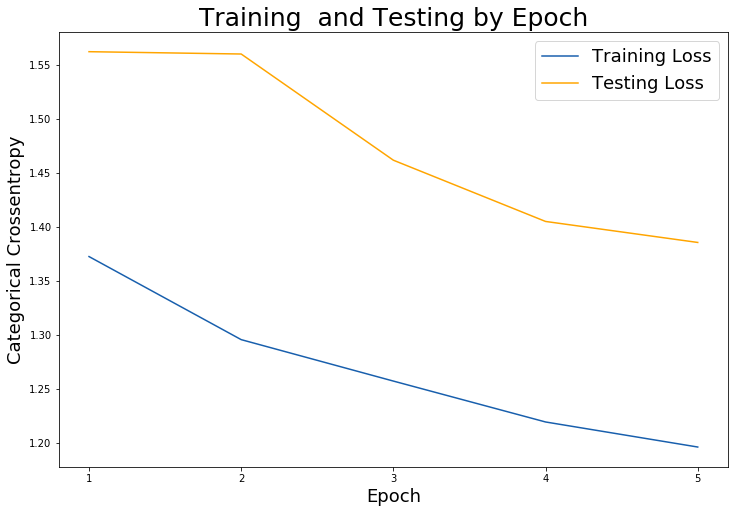

In [95]:
# Check out our train loss and test loss over epochs.
train_loss = history.history['loss']
test_loss = history.history['val_loss']

# Set figure size.
plt.figure(figsize=(12, 8))

# Generate line plot of training, testing loss over epochs.
plt.plot(train_loss, label='Training Loss', color='#185fad')
plt.plot(test_loss, label='Testing Loss', color='orange')

# Set title
plt.title('Training  and Testing by Epoch', fontsize = 25)
plt.xlabel('Epoch', fontsize = 18)
plt.ylabel('Categorical Crossentropy', fontsize = 18)
plt.xticks([0, 1, 2, 3, 4], [1, 2, 3, 4, 5])

plt.legend(fontsize = 18);
plt.savefig('../images/chart')

The summary and chart above reflects our thoughts on the relationship between the training and testing data.

---